In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-list/dataset.csv


# Введение

## ***Задача*** 
#### **Разработка и обучение моделей на основе линейных моделей, деревьев, модификации градиентного бустинга, нейронных сетей  для предсказания популярности трека на платформе Spotify.**

## **Импорт нужных библеотек**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras

## **Импорт датасета и пример как он выглядит**

In [3]:
data = pd.read_csv('/kaggle/input/spotify-list/dataset.csv')

In [4]:
data

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1              0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2              0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3              0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4              0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060  ...   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.97

## **Рассмотрим признаки**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Описание признаков

### 1. `track_id`
Уникальный идентификатор трека в базе данных Spotify, позволяющий однозначно идентифицировать каждую песю.

### 2. `artists`
Название исполнителей или групп, которые исполняют трек. Может содержать одного или нескольких артстов.

### 3. `album_name`
Название альбома, на котором находися трек.

### 4. `track_name`
Название трека, позволяющее идентифицирвать песню.

### 5. `popularity`
Оценка популярности трека на Spotify, обычно от 0 до 100, основанная на количестве прослушиваний и дугих факторах.

### 6. `duration_ms`
Длительность трек в миллисекундах.

### 7. `explicit`
Указывает, содержит ли трек ненормативную лексику (Tue) или нет (False).

### 8. `danceability`
Оценка танцевальности трека от 0 до 1, осноанная на ритме и темпе.

### 9. `energy`
Оценка энергии трека от 0 до 1, отражающая динамичноть и интенсивность музыки.

### 10. `key`
Ключ, в котором написан трек (от 0 до 11), где каждый номер соответстует определенной тональности.

### 11. `loudness`
Средняя ромкость трека в децибелах (dB).

### 12. `mode`
Режимтрека (0 - минорный, 1 - мажорный).

### 13. `speechiness`
Оценка речевости трека от 0 до 1, показывающая, насколько мого в нем речи по сравнению с музыкой.

### 14. `acousticness`
Оценка акустичности трека от 0 до 1, покзывающая, насколько он звучит натурально.

### 15. `instrumentalness`
Оценка инструментальности трека от 0 до 1. Выское значение указывает на отсутствие вокала.

### 16. `liveness`
Оценка живости записи от 0 до 1, показывающая вероятност того, что трек был записан в живом исполнении.

### 17. `valence`
Оценка валентност от 0 до 1, отражающая позитивные эмоции в музыке.

### 18. `tempo`
Темп трека в ударах в минуту (BPM).

### 19. `time_signature`
Размерность тата (например, 4/4 или 3/4), представленная целым числом.

### 20. `track_genre`
Жанр музыки, к которому принадлежит трек.

# **Анализ зависимости популярности от различных признаков (EDA)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='popularity', ylabel='Count'>

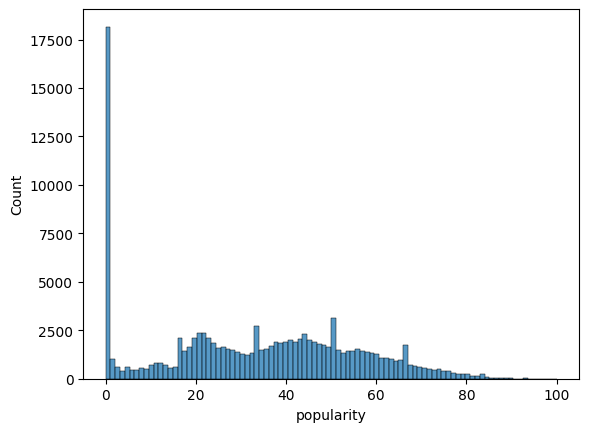

In [6]:
sns.histplot(data['popularity'], bins=94)

### 1. График зависимости популярности от танцевальности

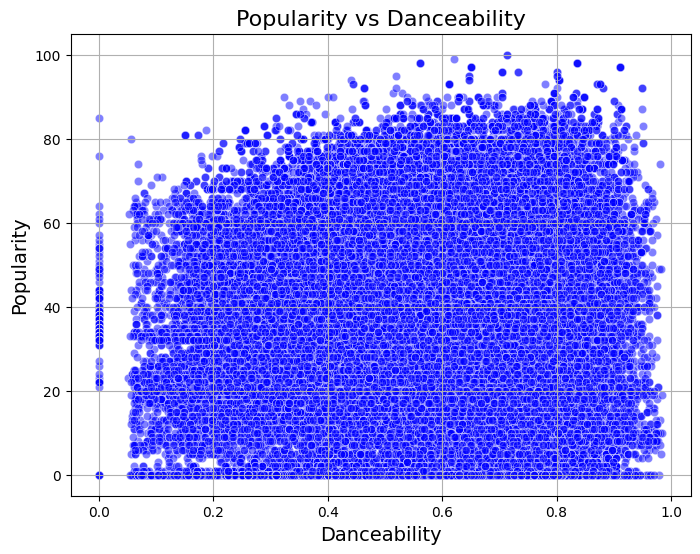

In [7]:
# Построение графика зависимости популярности от танцевальности
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["danceability"], y=data["popularity"], alpha=0.5, color="blue")
plt.title("Popularity vs Danceability", fontsize=16)
plt.xlabel("Danceability", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


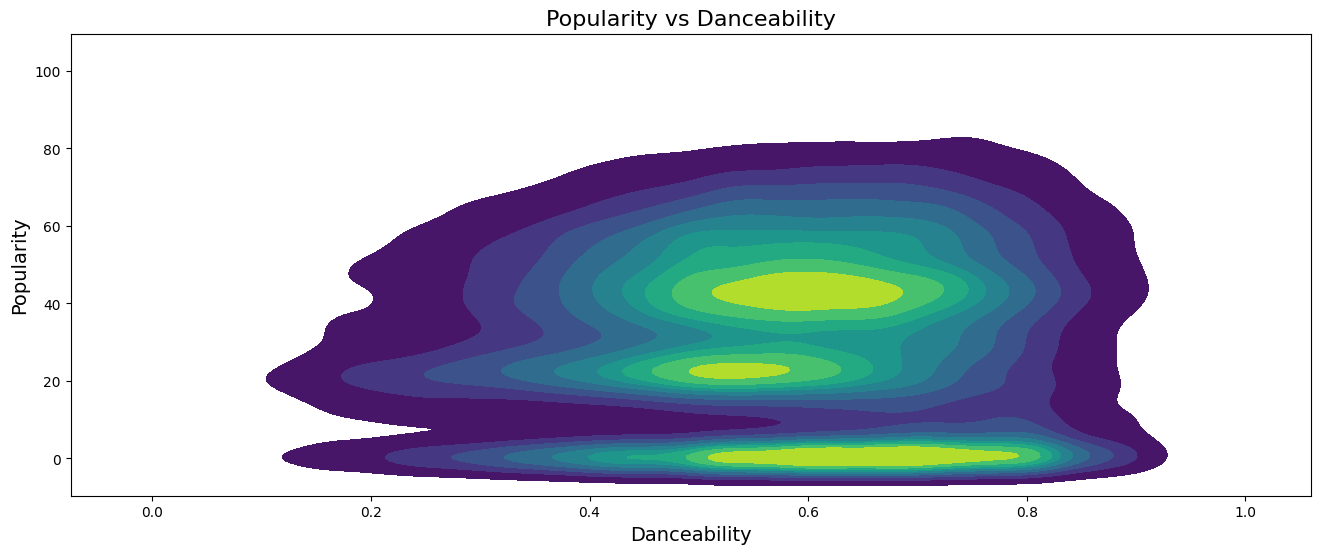

In [8]:
# Построение графика зависимости популярности от танцевальности более подробно на kde
plt.figure(figsize=(16, 6))
sns.kdeplot(data = data, x="danceability", y="popularity", cmap = "viridis", fill = True)
plt.title("Popularity vs Danceability", fontsize=16)
plt.xlabel("Danceability", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.show()

/tmp/ipykernel_24/1615760663.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dance_pop = data.groupby('danceability_bins')['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


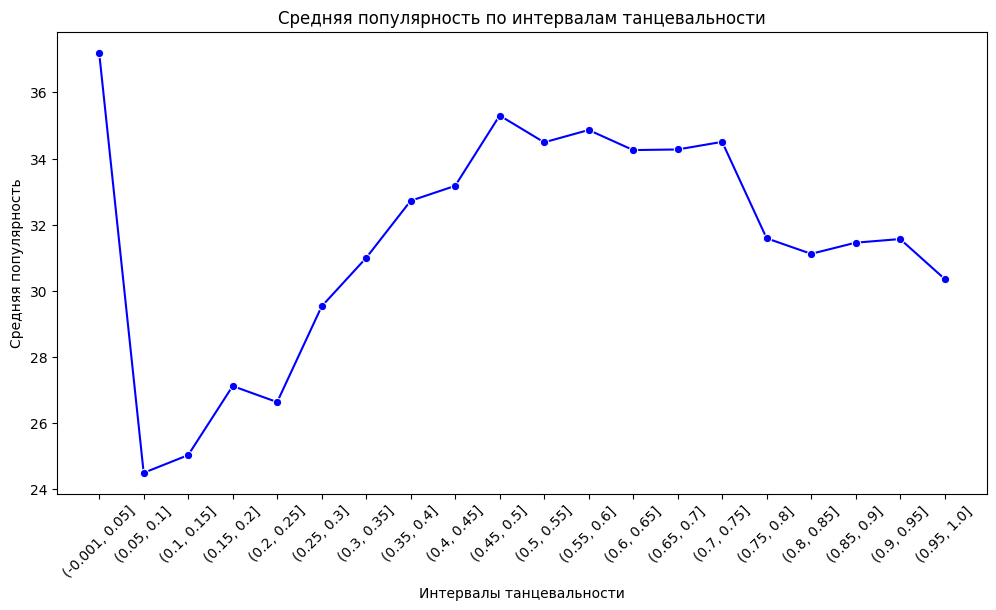

In [9]:
bins = np.linspace(0, 1, 21)

data['danceability_bins'] = pd.cut(data['danceability'], bins=bins, include_lowest=True)

dance_pop = data.groupby('danceability_bins')['popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=dance_pop.index.astype(str), y=dance_pop.values, marker="o", color="blue")
plt.title("Средняя популярность по интервалам танцевальности")
plt.xlabel("Интервалы танцевальности")
plt.ylabel("Средняя популярность")
plt.xticks(rotation=45)
plt.show()

1. **Popularity vs Danceability**
   - Треки с высокой танцевальностью (значения ближе к 1.0) имеют тенденцию быть более популярными, но зависимость не является строго линейной.
   - Популярные треки также встречаются среди менее танцевальных, что указывает на разнообразие предпочтений аудитории.
   - Также из последнего графика видно что есть категории зависимости популярности тркеа от танцевальности, выделим ***3 категории: 0.0-0.4 - low, 0.4-0.7 - medium, 0.7-1.0 - high***. Видим что категория medium выделяется на фоне других двух категорий



### 2. График зависимости популярности от энергии

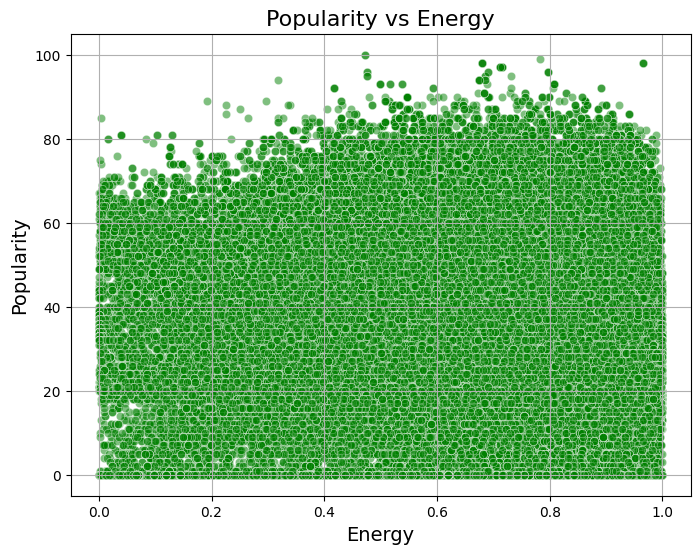

In [10]:
# Построение графика зависимости популярности от энергии
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["energy"], y=data["popularity"], alpha=0.5, color="green")
plt.title("Popularity vs Energy", fontsize=16)
plt.xlabel("Energy", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


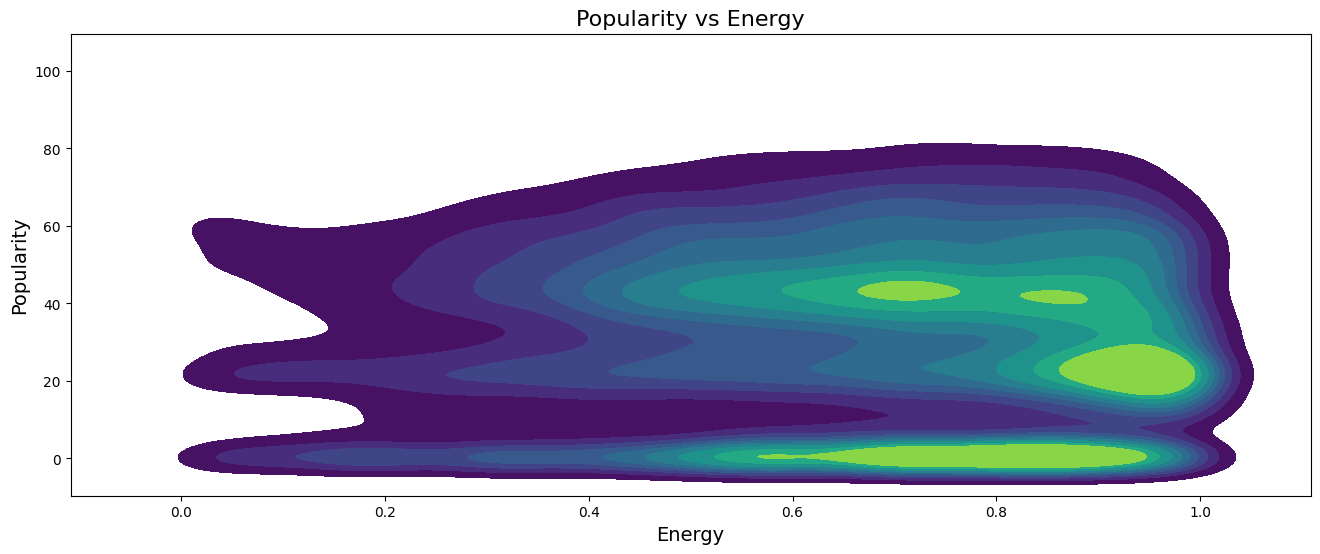

In [11]:
# Построение графика зависимости популярности от энергичности более подробно на kde
plt.figure(figsize=(16, 6))
sns.kdeplot(data = data, x="energy", y="popularity", cmap = "viridis", fill = True)
plt.title("Popularity vs Energy", fontsize=16)
plt.xlabel("Energy", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.show()

/tmp/ipykernel_24/2521651216.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enrgy_pop = data.groupby('energy_bins')['popularity'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


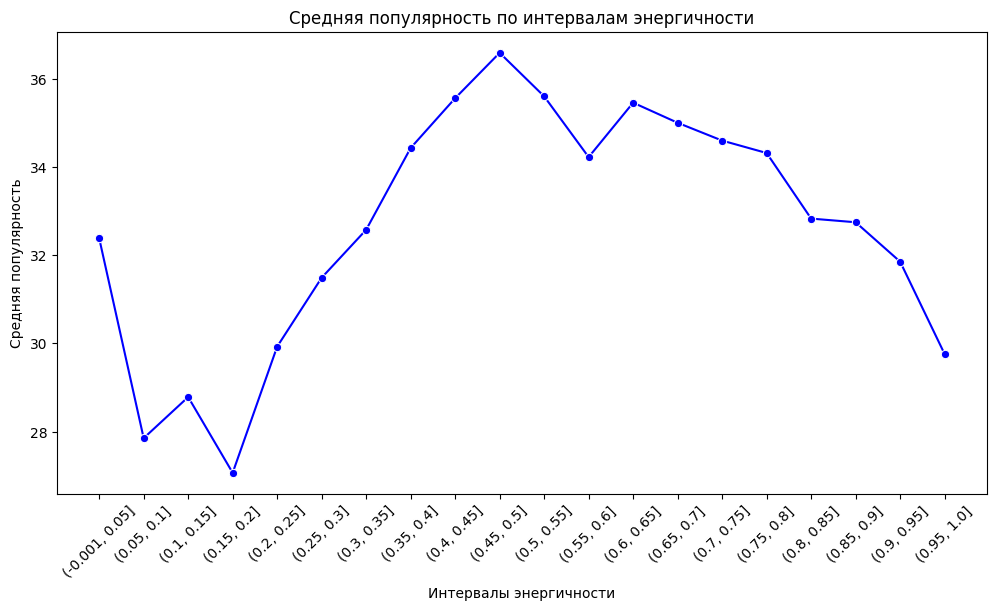

In [12]:
bins = np.linspace(0, 1, 21)

data['energy_bins'] = pd.cut(data['energy'], bins=bins, include_lowest=True)

enrgy_pop = data.groupby('energy_bins')['popularity'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=enrgy_pop.index.astype(str), y=enrgy_pop.values, marker="o", color="blue")
plt.title("Средняя популярность по интервалам энергичности")
plt.xlabel("Интервалы энергичности")
plt.ylabel("Средняя популярность")
plt.xticks(rotation=45)
plt.show()

2. **Popularity vs Energy**
   - В целом, энергичные треки имеют чуть большую популярность. Однако разброс значений указывает на то, что низкая энергия также не препятствует популярности, например каких то чилловых песен и так далее.
   - На втором и третьем графике видно, что есть какая то зависимость, поэтому выделим также ***3 категории: 0.0-0.4 - low, 0.4-0.8 - medium, 0.8-1.0 - high***. Также видим что категория medium выделяется среди оставшихся двух и имеет более высокое значение популярности.

### 3. График зависимости популярности от речистости

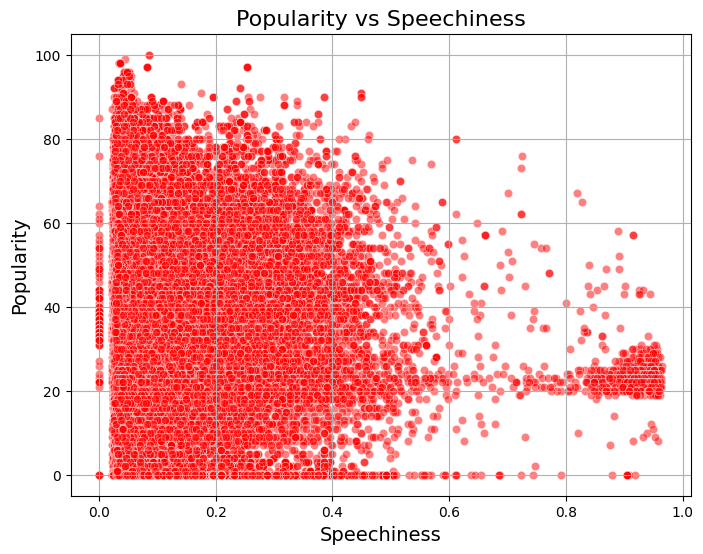

In [13]:
# Построение графика зависимости популярности от речистости(не знаю как еще)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["speechiness"], y=data["popularity"], alpha=0.5, color="red")
plt.title("Popularity vs Speechiness", fontsize=16)
plt.xlabel("Speechiness", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()


3. **Popularity vs Speechiness**
   - Треки с очень высоким уровнем речевитости, вероятно, представляют собой рэп, что снижает их популярность для массовой аудитории.
   - Умеренная речевитость характерна для популярных песен.

### 4. График зависимости популярности от акустичности

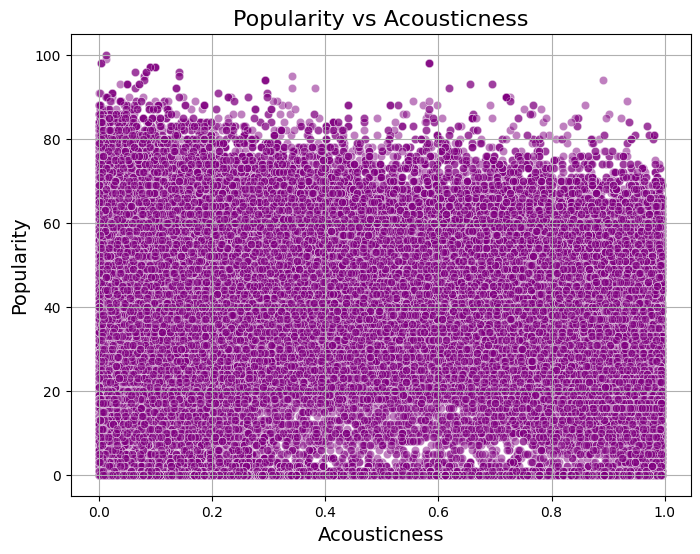

In [14]:
# Построение графика зависимости популярности от акустичности
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["acousticness"], y=data["popularity"], alpha=0.5, color="purple")
plt.title("Popularity vs Acousticness", fontsize=16)
plt.xlabel("Acousticness", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()


4. **Popularity vs Acousticness**
   - Высокая акустичность связана с популярностью в определенных жанрах, таких как акустическая музыка или классика. Однако в целом современные популярные треки менее акустические.

### 5. График зависимости популярности от инструментальности

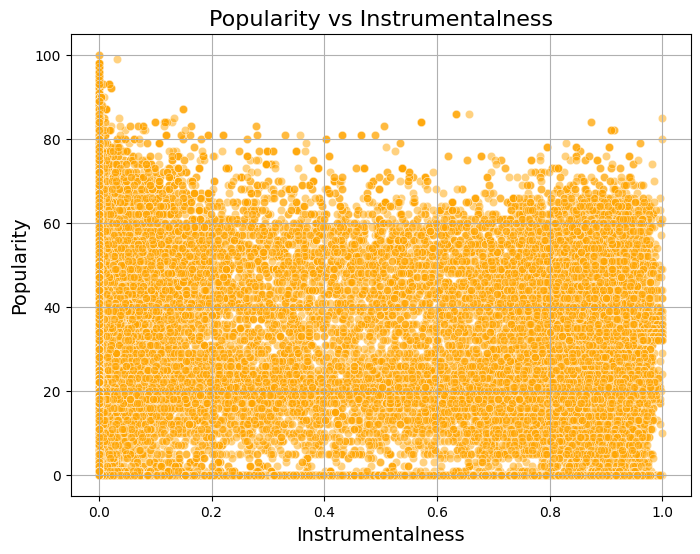

In [15]:
# Построение графика зависимости популярности от инструментальности
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["instrumentalness"], y=data["popularity"], alpha=0.5, color="orange")
plt.title("Popularity vs Instrumentalness", fontsize=16)
plt.xlabel("Instrumentalness", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()



5. **Popularity vs Instrumentalness**
   - Треки с высокой инструментальностью редко бывают популярными, что указывает на преобладание вокальных композиций в чартах.
   - Тем не менее, инструментальные треки могут быть популярны в нишевых жанрах, таких как классика или электронная музыка.

### 6. График зависимости популярности от живости звучания

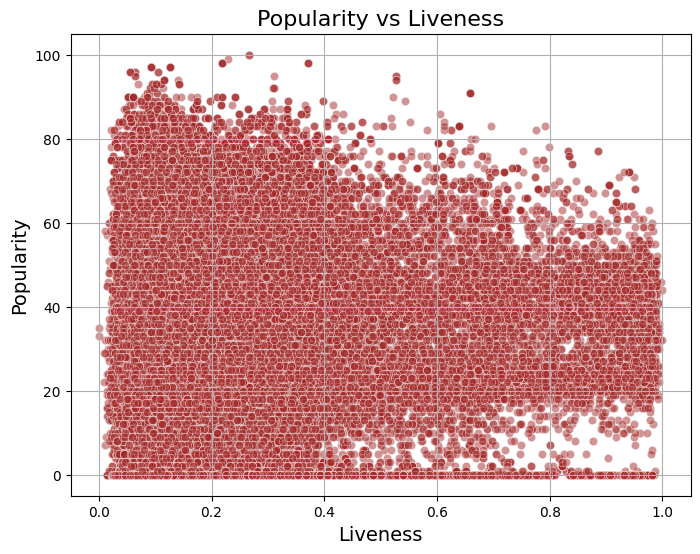

In [16]:
# Построение графика зависимости популярности от живости звучания
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["liveness"], y=data["popularity"], alpha=0.5, color="brown")
plt.title("Popularity vs Liveness", fontsize=16)
plt.xlabel("Liveness", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()


6. **Popularity vs Liveness**
   - Средние значения живости (около 0.2–0.5) часто коррелируют с популярностью, что может отражать "живое звучание" студийных записей, что может привлекать слушателя.
   - Слишком высокая живость, вероятно, характерна для живых выступлений, которые менее популярны в записи.

### 7. График зависимости популярности от валентности (настроения? песни)

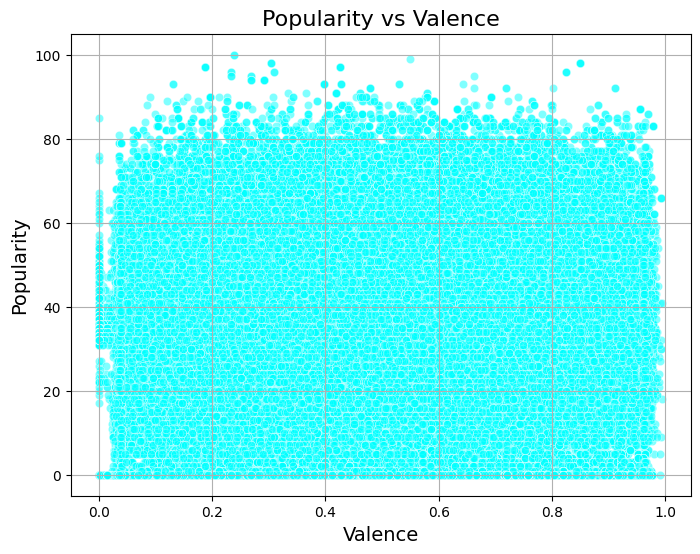

In [17]:
# Построение графика зависимости популярности от валентности
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["valence"], y=data["popularity"], alpha=0.5, color="cyan")
plt.title("Popularity vs Valence", fontsize=16)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()



7. **Popularity vs Valence**
   - Треки с высокой валентностью (счастливые, позитивные, эмоциональные) чаще популярны.
   - Тем не менее, низковалентные композиции (меланхоличные, грустные) также могут быть популярными, всякие sad песни, для людей в таком настроении.


### 8. График зависимости популярности от темпа

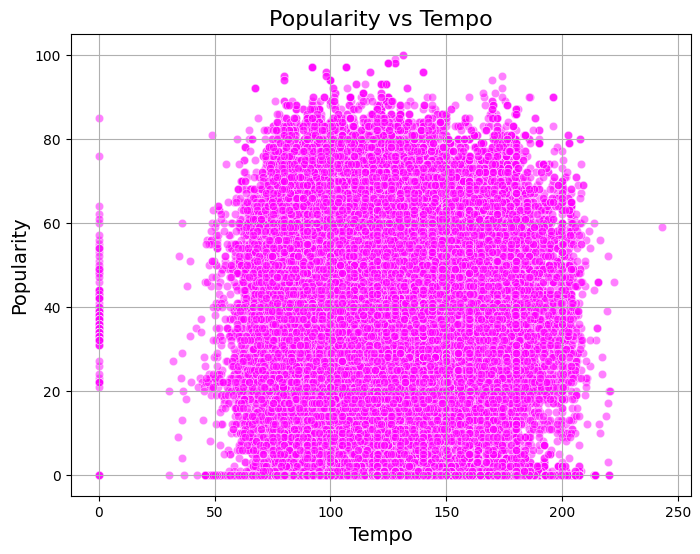

In [18]:
# Построение графика зависимости популярности от темпа
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data["tempo"], y=data["popularity"], alpha=0.5, color="magenta")
plt.title("Popularity vs Tempo", fontsize=16)
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.grid(True)
plt.show()



8. **Popularity vs Tempo**
   - Диапазон популярных треков по темпу довольно широкий, от медленных до быстрых.
   - Популярность не сильно зависит от темпа, но значения от 90 до 140 bpm чаще встречаются среди популярных треков.


### 9. График зависимости популярности от тональности

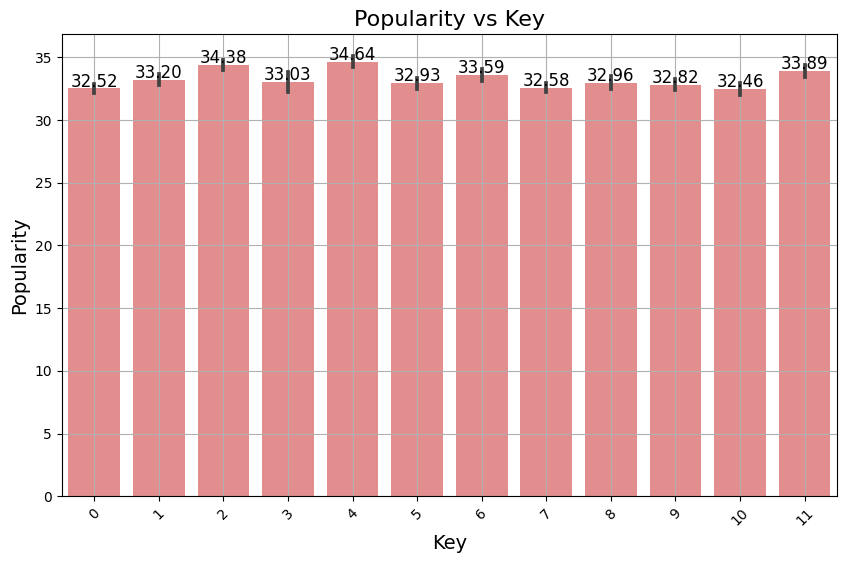

In [19]:
# Построение графика зависимости популярности от тональности
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=data["key"], y=data["popularity"], color="lightcoral")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("Popularity vs Key", fontsize=16)
plt.xlabel("Key", fontsize=14)
plt.ylabel("Popularity", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




9. **Popularity vs Key**
   - По данному параметру точно нельзя определить песни с какой тональностью популярнее. Каждый диапазон имеет почти одинаковую среднюю популярность.
   - Однако можно выделить тональности 2, 4 и 11, которые немного отличаются по популярности от остальных.

### 10. График зависимости популярности от мода(мажор/минор)

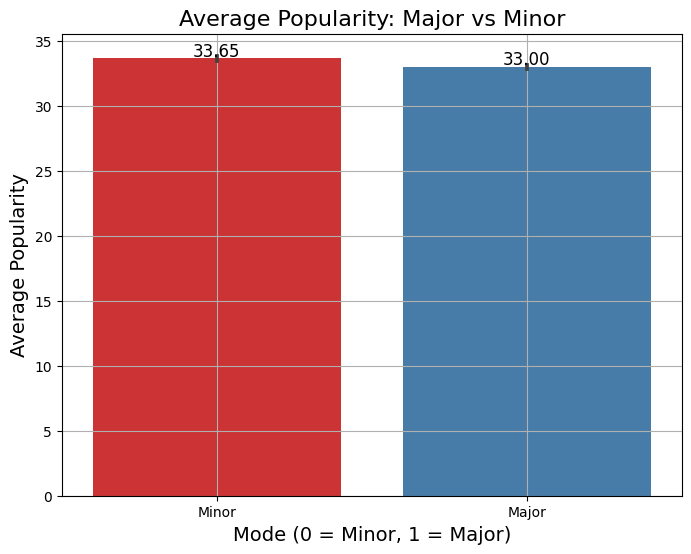

In [20]:
# Построение графика зависимости популярности от мода
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=data['mode'], y=data['popularity'], palette="Set1")
plt.title("Average Popularity: Major vs Minor", fontsize=16)
plt.xlabel("Mode (0 = Minor, 1 = Major)", fontsize=14)
plt.ylabel("Average Popularity", fontsize=14)
plt.xticks([0, 1], ['Minor', 'Major'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.grid(True)
plt.show()



10. **Popularity vs Mode**
    - Треки с минорным содержанием немного превосходят по популярности те, что с мажорным содержанием, но как признак выделить это трудно.


### 11. График зависимости популярности от длительности(в минутах)

/tmp/ipykernel_24/2577377652.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_popularity = data.groupby('duration_category')['popularity'].mean().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


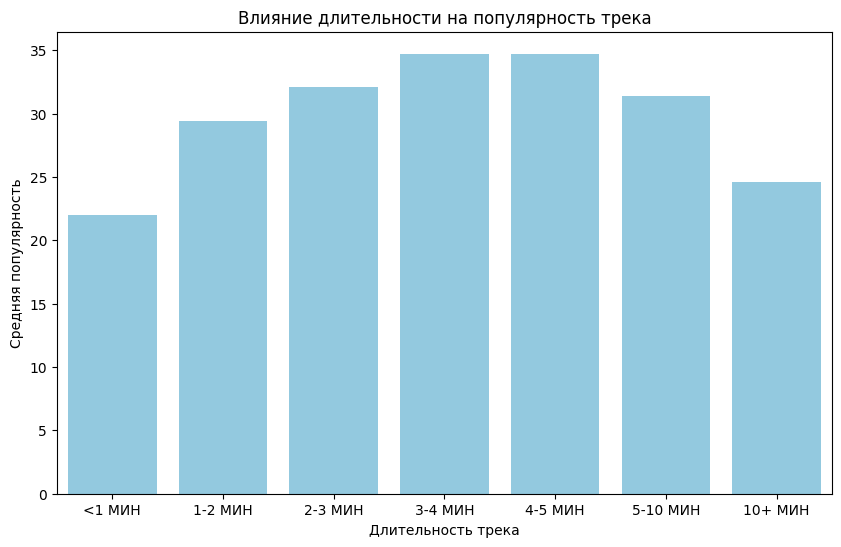

In [21]:
# Построение графика зависимости популярности от длительности
duration_min = data['duration_ms'] / 60000
bins = [0, 1, 2, 3, 4, 5, 10, duration_min.max()]
labels = ['<1 МИН', '1-2 МИН', '2-3 МИН', '3-4 МИН', '4-5 МИН', '5-10 МИН', '10+ МИН']
data['duration_category'] = pd.cut(duration_min, bins=bins, labels=labels)
duration_popularity = data.groupby('duration_category')['popularity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=duration_popularity, x='duration_category', y='popularity', color='skyblue')
plt.title('Влияние длительности на популярность трека')
plt.xlabel('Длительность трека')
plt.ylabel('Средняя популярность')
plt.show()

11. **Popularity vs Duration**
    - Треки, которые играют от 3 до 5 минут, являются более популярными, чем все остальные.
    - Есть исключения среди треков до одной минуты, скорее всего это демо-версии песен, которые могли завируситься в TikTok и подобных платформах.
    - ***Выделим три категории от 1-2 минут - short, от 2-5 мин - medium, 5 и более - long***.


In [22]:
data = data.drop(columns = ["danceability_bins", "energy_bins"])

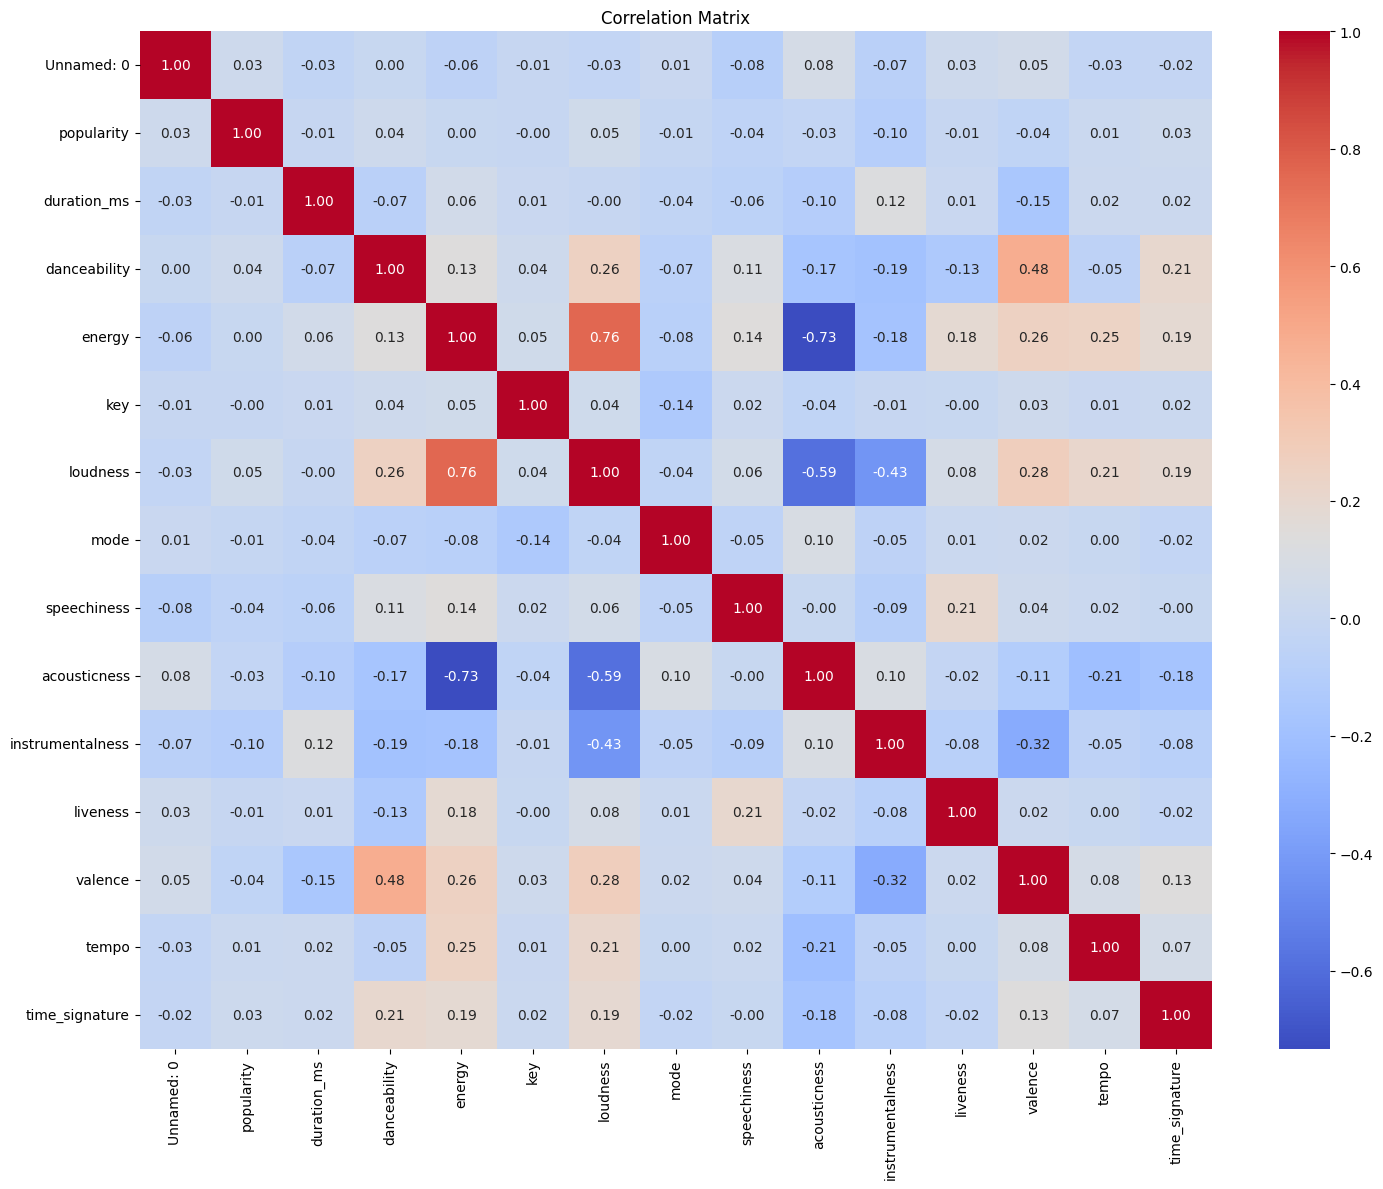

In [23]:
# Преобразуем булевы и категориальные признаки в числовые для корреляции
data_corr = data.copy()
# Создаем матрицу корреляции
correlation_matrix = data_corr.select_dtypes(include=np.number).corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Вывод из матрицы корреляции:
* Видно, что имеется высокая положительная корреляция между energy и loudness, так как обычно громкие треки обладают большой энергией.
* Видно, что acousticness имеет высокую отрицательную корреляцию с energy и loudness. можем сделать вывод что акустические треки менее громкие, и менее энергичные.
* Далее видно, что имеется средняя корреляция между valence и danceability, что в принципе тоже логично, под более позитивные треки хочется танцевать.
* Имееются нулевые показатели на характеристиках никак не связанных с музыкальными хар-ками(типа названия трека, исполнителя, колонка unnamed, и так далее)
* Также имеются низкие показатели корреляции именно на характеристиках описывающих музыкальность трека, такие как liveness, speechiness, mode и тп. Поэтому конкретных выводов по этим характеристикам сделать не можем, каждый аспект не зависит от другого.

### Комментарии к графикам - общая картина

1. **Popularity vs Danceability**
   - Треки с высокой танцевальностью (значения ближе к 1.0) имеют тенденцию быть более популярными, но зависимость не является строго линейной.
   - Популярные треки также встречаются среди менее танцевальных, что указывает на разнообразие предпочтений аудитории.
   - Также из последнего графика видно что есть категории зависимости популярности тркеа от танцевальности, выделим 3 категории 0.0-0.4 - low, 0.4-0.7 - medium, 0.7-1.0 - high. Видим что категория medium выделяется на фоне других двух категорий

2. **Popularity vs Energy**
   - В целом, энергичные треки имеют чуть большую популярность. Однако разброс значений указывает на то, что низкая энергия также не препятствует популярности, например каких то чилловых песен и так далее.

3. **Popularity vs Speechiness**
   - Треки с очень высоким уровнем речевитости, вероятно, представляют собой рэп, что снижает их популярность для массовой аудитории.
   - Умеренная речевитость характерна для популярных песен.

4. **Popularity vs Acousticness**
   - Высокая акустичность связана с популярностью в определенных жанрах, таких как акустическая музыка или классика. Однако в целом современные популярные треки менее акустические.

5. **Popularity vs Instrumentalness**
   - Треки с высокой инструментальностью редко бывают популярными, что указывает на преобладание вокальных композиций в чартах.
   - Тем не менее, инструментальные треки могут быть популярны в нишевых жанрах, таких как классика или электронная музыка.

6. **Popularity vs Liveness**
   - Средние значения живости (около 0.2–0.5) часто коррелируют с популярностью, что может отражать "живое звучание" студийных записей, что может привлекать слушателя.
   - Слишком высокая живость, вероятно, характерна для живых выступлений, которые менее популярны в записи.

7. **Popularity vs Valence**
   - Треки с высокой валентностью (счастливые, позитивные, эмоциональные) чаще популярны.
   - Тем не менее, низковалентные композиции (меланхоличные, грустные) также могут быть популярными, всякие sad песни, для людей в таком настроении.

8. **Popularity vs Tempo**
   - Диапазон популярных треков по темпу довольно широкий, от медленных до быстрых.
   - Популярность не сильно зависит от темпа, но значения от 90 до 140 bpm чаще встречаются среди популярных треков.

9. **Popularity vs Key**
   - По данному параметру точно нельзя определить песни с какой тональностью популярнее. Каждый диапазон имеет почти одинаковую среднюю популярность.
   - Однако можно выделить тональности 2, 4 и 11, которые немного отличаются по популярности от остальных.

10. **Popularity vs Mode**
    - Треки с минорным содержанием немного превосходят по популярности те, что с мажорным содержанием, но как признак выделить это трудно.

11. **Popularity vs Duration**
    - Треки, которые играют от 3 до 5 минут, являются более популярными, чем все остальные.
    - Есть исключения среди треков до одной минуты, скорее всего это демо-версии песен, которые могли завируситься в TikTok и подобных платформах.
    - Выделим три категории от 1-2 минут - short, от 2-5 мин - medium, 5 и более - long.


## **Общий вывод**

Популярность музыкального трека является сложным многофакторным явлением, зависящим от комбинации различных параметров, таких как танцевальность, энергетика, валентность и длительность. Оптимальные треки обычно имеют продолжительность 3-5 минут, умеренную танцевальность и энергетику, позитивный эмоциональный окрас, и попадают в темповый диапазон 90-140 bpm. При этом каждое правило имеет исключения, что подчеркивает субъективность музыкального восприятия и разнообразие предпочтения слушателей, где количественные характеристики встречаются с эмоциональным откликом аудитории.

# **Обработка данных + Feature Feature Engineering**

### 1. Проверяем есть ли пустые значения, также смотрим их количество

In [24]:
data.isnull().sum()

Unnamed: 0           0
track_id             0
artists              1
album_name           1
track_name           1
popularity           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
duration_category    1
dtype: int64

#### У нас всего 4 пустых значения поэтому можно их просто дропнуть

In [25]:
data = data.dropna()

In [26]:
data.isnull().sum()

Unnamed: 0           0
track_id             0
artists              0
album_name           0
track_name           0
popularity           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
duration_category    0
dtype: int64

In [27]:
data['track_id'].duplicated().sum()

24259

### 3. Выделим новую колонку genre_count.
Если посмотреть на количество дублирующихся треков, то оно довольно большое, посмотрев датасет я понял что один и тот же трек может относиться к разным жанрам, и выделил колонку с количеством жанров в треке. Поэтомк в колонке бкдкт находится значения с количеством жанров у трека

In [28]:
data['genre_count'] = data.groupby('track_id')['track_genre'].transform('nunique')

### 4. Уберем немузыкальные характеристики трека

In [29]:
data = data.drop(columns = ["Unnamed: 0", "track_id", "track_name"])

### 5. Выделим новую колонку duration_category в которой определим значения: 
* от 1-2 минут - short,
* от 2-5 мин - medium,
* 5 и более - long.

In [30]:
data["duration_category"] = pd.cut(data["duration_ms"], bins = [0, 2*60000, 5*60000, 100*60000], labels=["short", "medium", "long"])

### 6. Выделим новую колонку danceability_category в которой определим значения:
* 0.0-0.4 - low,
* 0.4-0.7 - medium,
* 0.7-1.0 - high.

In [31]:
data["danceability_category"] = pd.cut(data["danceability"], bins = [0, 0.4, 0.7, 1], labels=["low", "medium", "high"])

### 7. Выделим новую колонку energy_category в которой определим значения:
* 0.0-0.4 - low,
* 0.4-0.7 - medium,
* 0.7-1.0 - high.

In [32]:
data["energy_category"] = pd.cut(data["energy"], bins = [0, 0.4, 0.8, 1], labels=["low", "medium", "high"])

### 8. Выделим новую колонку energy_danceability_ratio
Показывает соотношение энергии и танцевальности, что может быть полезно для определения "зажигательности" трека

In [33]:
data['energy_danceability_ratio'] = data['energy'] / (data['danceability']+1e-9)

### 9. Выделим новую колонку energy_danceability_ratio
Соотношение позитивных эмоций (valence) к энергии, может помочь понять настроение трека/

In [34]:
data['valence_energy_ratio'] = data['valence'] / (data['energy'] + 1e-9)

### 10. Выделим новую колонку energy_danceability_ratio
Показывает, насколько громкость трека соответствует его энергии

In [35]:
data['loudness_energy_ratio'] = data['loudness'] / (data['energy']+1e-9)


### 11. Выделим новую колонку acoustic_energy_balance
Разница между acousticness и energy для понимания, насколько трек ближе к классической или попсовой.

In [36]:
data['acoustic_energy_balance'] = data['acousticness'] - data['energy']

### 12. Выделим новую колонку energy_valence
Показывает как энергия и позитивные эмоции в треке сочетаются вместе

In [37]:
data['energy_valence'] = (data['energy'] * data['valence'])


### 13. Выделим новую колонку lively_instrumentalness
Показывает, как инструментальность сочетается с живостью

In [38]:
data['lively_instrumentalness'] = data['instrumentalness'] * data['liveness']

## Исправление типов данных
Для обработки данных нейросетью надо перевести их в числовые значения

In [39]:
numerical_features = data.select_dtypes(include=['number', 'float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

### Исправление данных с помощью LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

## Создание матрицы корреляции новых признаков

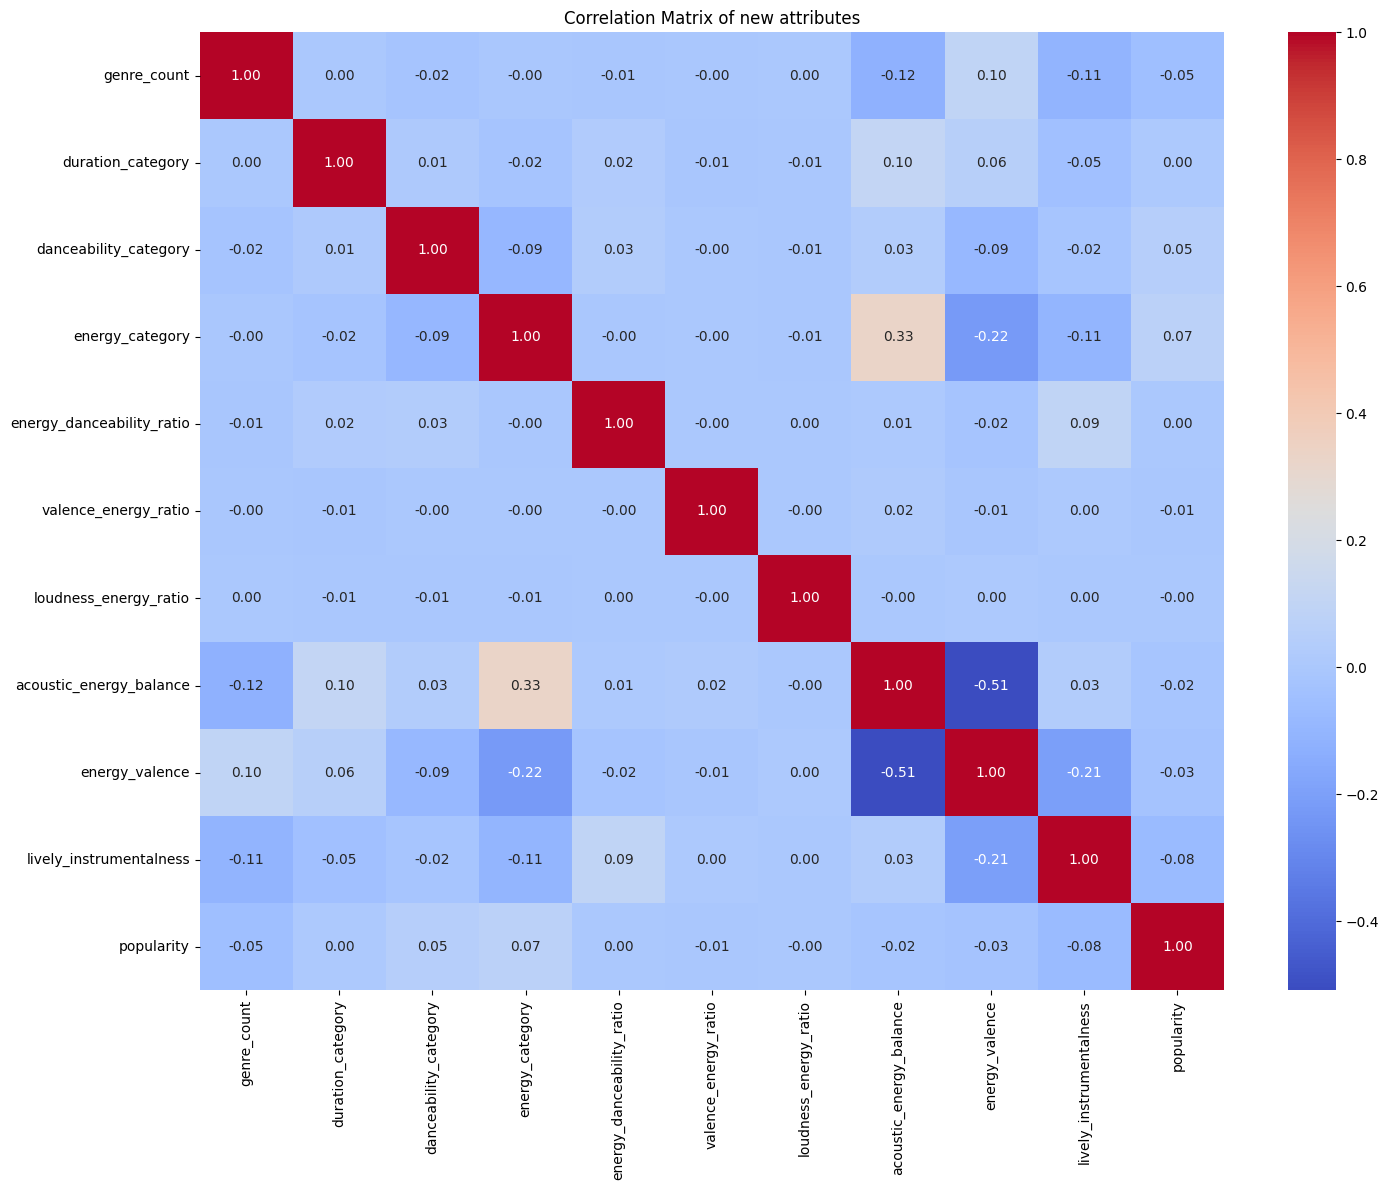

In [42]:
data_corr = data.copy()
# Создаем матрицу корреляции
correlation_matrix = data[['genre_count','duration_category', 'danceability_category', 'energy_category', 'energy_danceability_ratio', 'valence_energy_ratio',
                          'loudness_energy_ratio', 'acoustic_energy_balance', 'energy_valence', 'lively_instrumentalness', 'popularity']].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of new attributes")
plt.tight_layout()
plt.show()

### Вывод из матрицы корреляции добавленных признаков:
* Из таблицы корреляции видно, что каждый почти каждый признак влияет на значение популярности трека.
* Есть признаки которые никак не влияют на популярность трека - energy_danceability_ratio, loudness_energy_ratio
* Самыми влияющими признаками из представленных стали lively_instrumentalness, energy_category, genre_count

# Обучение моделей

### Определения метрик оценки моделей

1. **MAE (Mean Absolute Error)**
   Среднее абсолютное отклонение между фактическими и предсказанными значениями.

2. **MSE (Mean Squared Error)**
   Среднее квадратичное отклонение между фактическими и предсказанными значениями.

3. **RMSE (Root Mean Squared Error)**
   Корень из среднего квадратичного отклонения между фактическими и предсказанными значениями.

4. **MAPE (Mean Absolute Percentage Error)**
   Среднее абсолютное процентное отклонение между фактическими и предсказанными значениями.

5. **R² (Coefficient of Determination)**
   Доля дисперсии зависимой переменной, объясняемая регрессионной моделью.
ионной моделью.
< 0 \): модель хуже, чем прогнозирование среднего значения.



### Разделение данных на обучающую и тестовую сборки

In [43]:
X = data.drop(columns=['popularity']) 
y = data['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Нормализация данных

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   artists                    113999 non-null  int64  
 1   album_name                 113999 non-null  int64  
 2   popularity                 113999 non-null  int64  
 3   duration_ms                113999 non-null  int64  
 4   explicit                   113999 non-null  bool   
 5   danceability               113999 non-null  float64
 6   energy                     113999 non-null  float64
 7   key                        113999 non-null  int64  
 8   loudness                   113999 non-null  float64
 9   mode                       113999 non-null  int64  
 10  speechiness                113999 non-null  float64
 11  acousticness               113999 non-null  float64
 12  instrumentalness           113999 non-null  float64
 13  liveness                   113999 

### Функция для подсчета метрик

In [46]:
def calculate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }
    return metrics

## Линейная модель

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

linear_model = LinearRegression()

y_pred = cross_val_predict(linear_model, X_train, y_train, cv = 5)

metrics = calculate_metrics(y_train, y_pred)

print("Metrics:")
for metric, value in metrics.items():
    print(f"- {metric}: {value:.2f}")

Metrics:
- MAE: 19.07
- MSE: 65607.26
- RMSE: 256.14
- MAPE: 20392505230895844.00
- R2: -130.78


### Вывод по линейной модели

- **MAE: 19,07** - средняя абсолютная ошибка указывает на довольно слабый результат, но не самый наихудший.
- **MSE: 65607,26** - аномальное значение, не могу понять с чем связано.
- **RMSE: 256,14** - аналоги
- **MAPE: inf** - огромное MAPE изза большого количества нулей в целевой переменнойчно.
- **R²: -130,78** - данное значение указывает, что модель вообще не попадает в указанные значения.


## Модель дерево решений

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)

y_pred = cross_val_predict(tree_model, X_train, y_train, cv = 5)

metrics = calculate_metrics(y_train, y_pred)
print("Metrics:")
for metric, value in metrics.items():
    print(f"- {metric}: {value:.2f}")

Metrics:
- MAE: 10.47
- MSE: 344.89
- RMSE: 18.57
- MAPE: 5452452301633486.00
- R2: 0.31


### Вывод по модели дерево решений

- **MAE: 10.47** - модель показала себя лучше линейной модели по этому показателю почти в 2 раза, что нам говорит о лучшей точности предсказания.
- **MSE: 344.89** - показывает хорошее значение, но оно не сказать что низкое. Также может быть завышена из-за аномальных выбросов.
- **RMSE: 18.5757** - аналогично предыдущему пункту.
- **MAPE: inf** - опмнной.
- **R²: 0.31** - хороший показатель, но тоже далек от идеала. Но гораздо лучше чем в прошлой модели, что указывает на большую точность дерева решений.
 0.31

## Модель на основе градиентного бустинга

### Модель 1 XGBoost

In [73]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=6, n_estimators=100)
xgb_model.fit(X_train, y_train)

y_pred = cross_val_predict(xgb_model, X_train, y_train, cv = 5)

metrics = calculate_metrics(y_train, y_pred)
print("Metrics:")
for metric, value in metrics.items():
    print(f"- {metric}: {value:.2f}")


Metrics:
- MAE: 12.96
- MSE: 288.61
- RMSE: 16.99
- MAPE: 13823921962163796.00
- R2: 0.42


### Вывод по модели XGBoost

- **MAE: 12.96** - показатель немного выше, чем у модели дерева решений.
- **MSE: 288.61** - самый низкий показатель MSE среди всех моделей, что говорит о том, что XGBoost лучше всего справляется с задачей.
- **RMSE: 16.99** - аналогично предыдущему пункту.
- **MAPE: inf** - `inf` потому что большое количество нулей в целевой переменной.
- **R²: 0.42** - также самый высокий показатель коэффициента детерминации, что указывает на превосходство данной модели перед другими.


### Модель 2 sklearn

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

sklboost_model = GradientBoostingRegressor(random_state=42)

y_pred = cross_val_predict(sklboost_model, X_train, y_train, cv=5)

metrics = calculate_metrics(y_train, y_pred)
print("Metrics:")
for metric, value in metrics.items():
    print(f"- {metric}: {value:.2f}")


Metrics:
- MAE: 15.77
- MSE: 384.60
- RMSE: 19.61
- MAPE: 17726328142084314.00
- R2: 0.23


### Вывод по модели sklearn gradient boosting

- **MAE: 15.77** - не самый худший показатель среди всех моделей, но все равно является одним из самых больших.
- **MSE: 384.60** - высокий показатель MSE, модель плохо справляется с задачей.
- **RMSE: 19.61** - аналогично пункту выше.
- **MAPE: inf** - `inf` потому что большое количество нулей в целевой переменной.
- **R²: 0.23** - тоже почти самый низкий показатель среди всех моделей.
0.23

## Нейронная сеть

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold, cross_val_score

neuro_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Первый скрытый слой
    BatchNormalization(),  # Нормализация
    Dropout(0.3),  # Регуляризация
    Dense(64, activation='relu'),  # Второй скрытый слой
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),  # Третий скрытый слой
    Dense(1, activation='linear')  # Выходной слой
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Оптимизатор

In [115]:
optimizer = Adam(learning_rate=0.001)

#### Компиляция модели

In [116]:
neuro_model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape', 'r2_score'])

#### Обучение нейронной сети

In [117]:
history = neuro_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)
y_pred = neuro_model.predict(X_test)

Epoch 1/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 621.1561 - mae: 20.1186 - mape: 3618181632.0000 - mse: 621.1561 - r2_score: -0.2478 - val_loss: 442.0173 - val_mae: 16.9925 - val_mape: 4183681280.0000 - val_mse: 442.0173 - val_r2_score: 0.1164
Epoch 2/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 457.6593 - mae: 17.3737 - mape: 4207773952.0000 - mse: 457.6593 - r2_score: 0.0770 - val_loss: 442.2802 - val_mae: 16.8390 - val_mape: 4057595392.0000 - val_mse: 442.2802 - val_r2_score: 0.1158
Epoch 3/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 452.7486 - mae: 17.2526 - mape: 4214270208.0000 - mse: 452.7486 - r2_score: 0.0891 - val_loss: 436.7823 - val_mae: 16.6338 - val_mape: 3968479488.0000 - val_mse: 436.7823 - val_r2_score: 0.1268
Epoch 4/10
4560/4560 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 445.6633 - mae: 17.0896 - mape: 4188213248.0000 - mse: 445.6633 - r2_score: 0.1044 - val_loss: 432.2029 - val_mae: 16.5817 - val_mape: 4013516288.0000 - val_mse: 432

### Построение графиков обучения нейросети

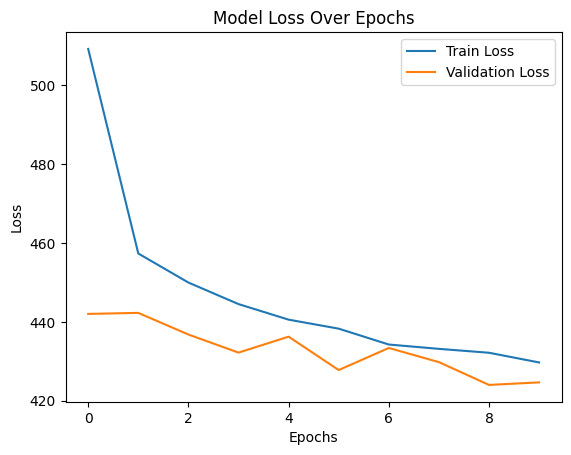

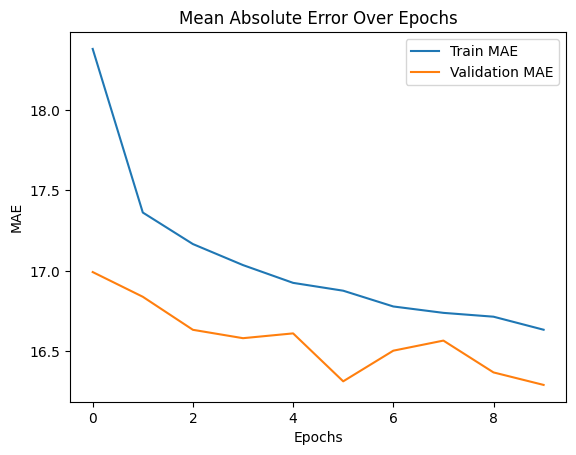

In [119]:
# Построение графиков обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Кросс-валидация

In [118]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_metrics = []
fold_history = []

for i, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_kf_train, X_kf_val = X_train[train_index], X_train[val_index]
    y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]

    kf_history = neuro_model.fit(X_kf_train, y_kf_train, epochs=10, batch_size=16, verbose=0)

    fold_history.append(kf_history)

    y_pred = neuro_model.predict(X_kf_val)

    metrics = calculate_metrics(y_kf_val, y_pred)
    fold_metrics.append(metrics)

    print(f"Fold {i+1}: {metrics}")

average_metrics = {metric: np.mean([fold_metric[metric] for fold_metric in fold_metrics]) for metric in fold_metrics[0]}
std_metrics = {metric: np.std([fold_metric[metric] for fold_metric in fold_metrics]) for metric in fold_metrics[0]}

print("Average Metrics")
for metric, value in average_metrics.items():
    print(f"{metric}: {value:.4f} (std: {std_metrics[metric]:.4f})")

570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 1: {'MAE': 15.983438232188162, 'MSE': 425.78943386552925, 'RMSE': 20.634665828782623, 'MAPE': 1.76681399860818e+16, 'R2': 0.15011804360274805}
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 2: {'MAE': 15.560215257330421, 'MSE': 391.5682753297214, 'RMSE': 19.788084175324336, 'MAPE': 1.7472486853383336e+16, 'R2': 0.2131835145105916}
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 3: {'MAE': 15.215642643301633, 'MSE': 378.5717627172637, 'RMSE': 19.456920689494105, 'MAPE': 1.675047387084583e+16, 'R2': 0.23937787217975226}
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Fold 4: {'MAE': 15.606302659814817, 'MSE': 658.7602294967444, 'RMSE': 25.666324814759598, 'MAPE': 1.7081352099228618e+16, 'R2': -0.3256130045793151}
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 5: {'MAE': 15.403322717770783, 'MSE': 383.6329906160062, 'RMSE': 19.586551269072515, 'MAPE': 1.6777199541178564e+16, 'R2': 0.22622044421859522}
Average Metrics
MAE: 15.5538 (std: 0.2547)
MSE: 447.6

### Вывод по нейронной сети

- **MAE: 15.5538** - один из самых высоких показателей среди всех моделей, что говорит о том, что нейросеть плохо решает такие задачи.
- **MSE: 447.6645** - тоже довольно высокий показатель среди всех моделей.
- **RMSE: 21.0265** - аналогично предыдущему пункту.
- **MAPE: inf** - `inf` потому что большое количество нулей в целевой переменной.
- **R²: 0.1007** - почти самое низкое значение среди всех моделей.
153)

# Feature Importances

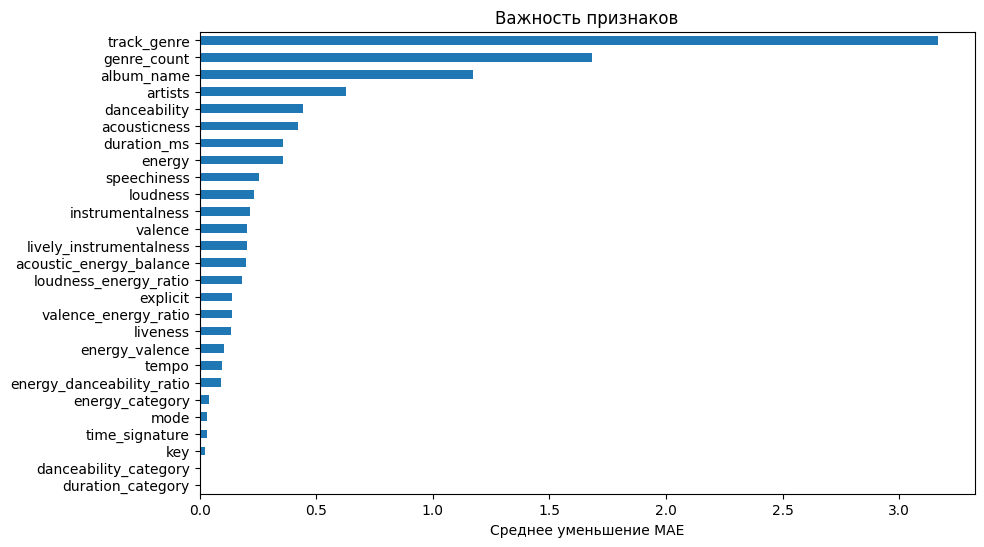

In [120]:
# Важность признаков с помощью permutation importance
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

## Вывод по Feature Importances
* Главной характеристикой на которую опирается модель стала track_genre.
* Также одной из важных характеристик стала genre_count, счетчик жанров трека, характеристика которую я ввел во время Feature Engineering
* Также моделью были задействованы следующие выделенные мной признаки - genre_count, energy_danceability_ratio, valence_energy_ratio, loudness_energy_ratio, acoustic_energy_balance, energy_valence, lively_instrumentalness.

# Вывод

### Во время выполнения задачи мной была проделана следующая работа:
1. Проведен EDA анализ, было построено более 15 графиков и проанализировано 11 зависимостей признака к таргету.
2. Работа с датасетом, при помощи Feature Engineering, мной было выделено 10 новых признаков/колонок, для более хорошего результата обработки данных нейросетью.
3. Обучение моделей, мной было обучено 5 моделей, из которых 1 - линейная модель, 1- дерево решений, 2 - модели с модификацией градиентного бустинга, 1- нейронная сеть. Каждую модель тестировал на 5 фолдах в кросс валидации, и исходя из этого выделил лучшую.

## Итог

#### Лучшей моделью из представленных стала модель с модификацией градиентного бустинга, а именно XGBoost, ее показатели:
- MAE: 12.96
- MSE: 288.61
- RMSE: 16.99
- MAPE: 13823921962163796.00
- R2: 
  0.42

#### При выведении важности признаков для данной модели Feature Importances, важными характеристиками сиали те, которые я добавил в разделе Feature Engineering.